# Метод главных компонент

In [47]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [48]:
# Выгружаем базу данных
digits = datasets.load_digits()
digits.data.shape
X = digits.data
# цифры от 0 до 9
labels = digits.target

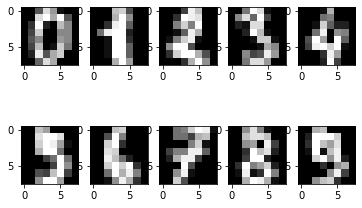

In [49]:
# Нарисуем примеры картинок из Х
for i in range(10):  
    plt.subplot(2,5,i+1)
    plt.imshow(X[i].reshape(8,8), cmap='gray')
plt.show()

In [50]:
class my_PCA():
    def _init_(self):
        pass
# Разложение матрицы ковариации по собственным векторам  
    def fit(self, X):
        x_mean = X.mean(axis = 0)
        X_centered = X - x_mean             # центрирование данных
        C = X_centered.T.dot(X_centered)    # построение матрицы ковариаций
        lambdas, F = np.linalg.eig(C)       # поиск собственных значений
        self.F = F                          # собственные вектора матрицы ковариаций (главные компоненты)
        self.lambdas = lambdas              # собственные значения матрицы ковариаций
  # преобразование данных в координаты в базисе главных компонент          
    def transform(self, X):
        x_mean = X.mean(axis = 0)
        X_centered = X - x_mean
        return X_centered.dot(self.F)
  # применение уменьшения размерности к X
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)



In [51]:
from sklearn.decomposition import PCA

In [52]:
pca = my_PCA()
pca.fit(X)
Y = pca.transform(X)

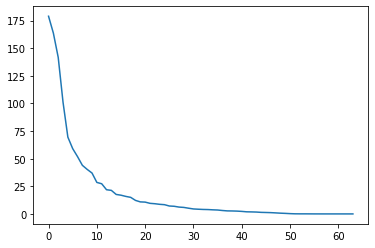

In [55]:
x_mean = X.mean(axis = 0)
X_centered = X - x_mean             # центрирование данных
C = X_centered.T.dot(X_centered)    # построение матрицы ковариаций
lambdas, F = np.linalg.eig(C) 
plt.plot(lambdas/1797) #график собственных значений

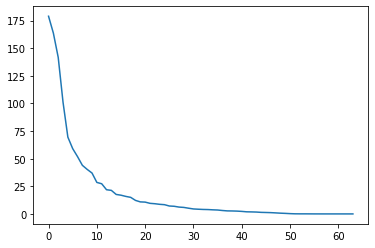

In [56]:
plt.plot(Y.var(axis=0))   

In [60]:
np.allclose(C, F.dot(np.diag(lambdas)).dot(F.T))  

True

In [ ]:
Значит, собственные числа равны дисперсии данных(графики совпадают)

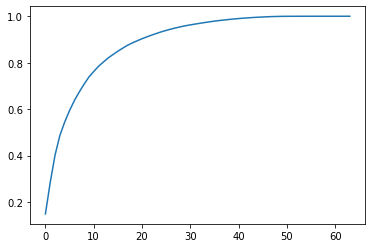

In [57]:
plt.plot(np.cumsum(lambdas)/np.sum(lambdas))     #график отношения кумулятивной суммы к их полной сумме

Как можно заметить, первые 15 главных
компонент покрывают приблизительно 82% дисперсии

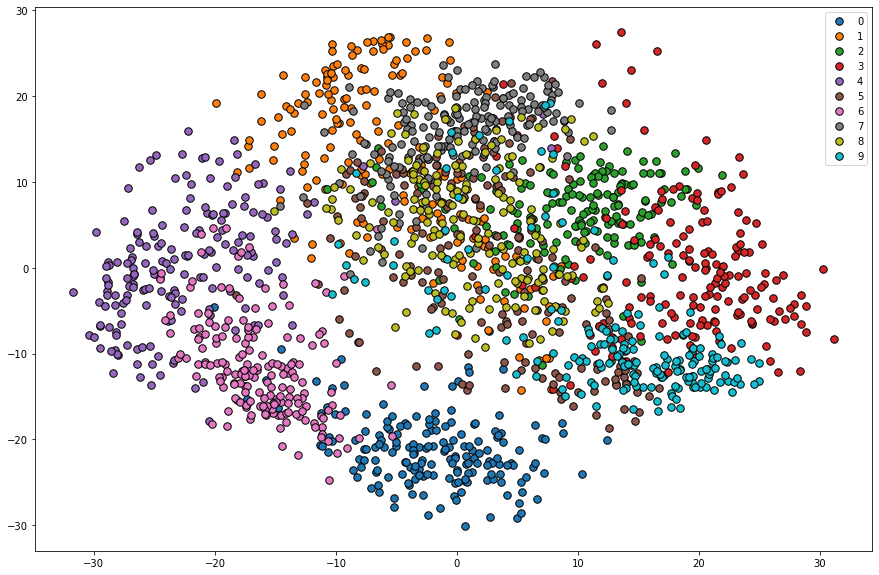

In [59]:
# изобразим на графике точки датасета в первых двух координатах главных компонент
plt.figure(figsize=(15,10))
#  цикле идем по классам(цифрам от  до 9)
for k in range (10):
    # берем 0-ую и 1-ую главные компоненты
    plt.plot(Y[labels==k, 0], Y[labels==k, 1], '.', markeredgecolor='k', markersize = 15, label =k)
plt.legend()

# Метод k ближайших соседей

In [21]:
class my_KNN():
    def __init__(self, k):
        # k - a number of nearest neighbours
        self.k = k
    def fit(self, X, labels):
        self.X_train = X
        self.labels_train = labels
    def predict(self, X):
        # посчитать расстояния до всех точек self.X_train = X
        #найти self.k ближайших точек
        #отнести к тому классу, где больше количество ближайших соседей
                #посчитать расстояние до всех точек self.X_train
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype = self.ytr.dtype)

        for i in range(num_test):
            distances = np.sum(np.abs(self.X_train - X[i,:]), axis = 1) #4
            min_index = np.argmin(distances) #5
            Ypred[i] = self.ytr[min_index] #6

        return Ypred


In [22]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Разобьем данные X и labels на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((1203, 64), (594, 64))

In [25]:
X_train, X_test

(array([[ 0.,  0.,  0., ..., 13.,  0.,  0.],
        [ 0.,  0.,  1., ...,  7.,  0.,  0.],
        [ 0.,  1., 12., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  9., ..., 16.,  2.,  0.],
        [ 0.,  0.,  1., ...,  0.,  0.,  0.],
        [ 0.,  0.,  1., ...,  1.,  0.,  0.]]),
 array([[ 0.,  0.,  0., ..., 14.,  5.,  0.],
        [ 0.,  0., 11., ...,  1.,  0.,  0.],
        [ 0.,  0.,  8., ...,  8.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  2.,  0.,  0.],
        [ 0.,  0.,  9., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  5.,  0.,  0.]]))

In [26]:
X = [[0],[1],[2],[3]]
y = [0,0,1,1]
neigh =  my_KNN(k = 3)
neigh.fit(X, y)
print(neigh.predict([[1.1]]))

AttributeError: 'list' object has no attribute 'shape'